# Prediksi Pasar Modal dengan LSTM dengan Dataset Baru

## A.	Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## B.	Loading the dataset

a. Membaca dataset NSE-TATAGLOBAL.csv

In [2]:
dataset_train = pd.read_csv('asus.csv', sep = ';')
training_set = dataset_train.iloc[:, 1:2].values

b.	Menampilkan lima baris teratas dari dataset training.

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 30, 2019",208.0,209.5,207.5,209.5,209.5,"1,016,077"
1,"Oct 29, 2019",212.0,212.0,208.0,209.5,209.5,"1,014,068"
2,"Oct 28, 2019",210.0,211.5,209.0,211.5,211.5,"606,653"
3,"Oct 25, 2019",212.0,212.5,207.5,209.0,209.0,"1,628,445"
4,"Oct 24, 2019",210.5,212.0,209.5,211.5,211.5,"1,259,050"


## C.	Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## E.	Creating Data with Timesteps

In [6]:
X_train = []
y_train = []
for i in range(7, 217):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## E.	Building the LSTM

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
210/210 [==============================] - 6s 28ms/step - loss: 0.0637
Epoch 2/100
210/210 [==============================] - 2s 8ms/step - loss: 0.0250
Epoch 3/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0250
Epoch 4/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0247
Epoch 5/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0231
Epoch 6/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0219
Epoch 7/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0227
Epoch 8/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0211
Epoch 9/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0252
Epoch 10/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0216
Epoch 11/100
210/210 [==============================] - 1s

## F.	Predicting Future Stock using the Test Set

In [9]:
dataset_test = pd.read_csv('asustest.csv', sep = ';')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(7, 31):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## G.	Plotting the Result

Visualisasi harga saham prediksi dengan harga saham sebenarnya dari Asus.

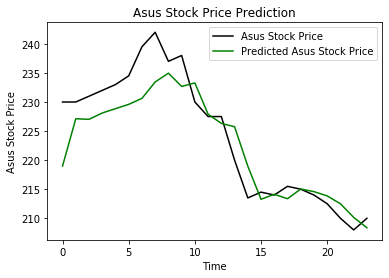

In [12]:
plt.plot(real_stock_price, color = 'black', label = 'Asus Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Asus Stock Price')
plt.title('Asus Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Asus Stock Price')
plt.legend()
plt.show()

Pada grafik tersebut dapat dilihat bahwa penggunaan LSTM dapat memprediksi pergerakan harga saham Asus dengan akurat.